In [1]:
#importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
#Reading the dataset

mnist = loadmat("mnist-original.mat")
mnist = {
    "data":mnist["data"].T,
    "targets":mnist["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [4]:
X, y = mnist["data"], mnist["targets"]

In [5]:
#Splitting training and testing data

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

## Pipeline

In [10]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('std_scaler', StandardScaler)
# ])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

In [21]:
# Trying with weights='Distance' and n_neighbors=4 for KNN

knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)
# knn_clf.fit(X_train_scaled, y_train) -- Scaling the inputs decreases accuracy
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
# cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9428, 0.9442, 0.9443])

In [22]:
y_pred = knn_clf.predict(X_test)

In [23]:
## Checking testing accuracy after tuning hyperparmaters

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9714

## Data Augmentation

In [24]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [25]:
random_digit = X_train[0]

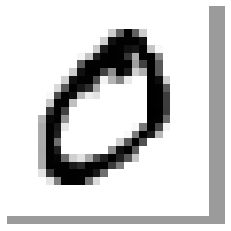

In [33]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy, new=0):
    shifted_image = shift(image.reshape(28,28), [dy,dx], cval=new)
    return shifted_image.reshape([-1])
plot_digit(shift_image(random_digit, -2, -1, new=100))

In [28]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
    

((300000, 784), (300000,))

In [30]:
#training model on expanded dataset

knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
y_pred_expanded = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred_expanded)

0.9763